# Heart Disease Prediction using Machine Learning (GROUP 30)


  **Group Guide :Pallavi Patil**
  
**Group Members:** 

**1 SHOBHAN AKSHAY GIRIDHARAN**

**2 SNEHA JAYWANT SABLE**

**3 PAYAL SANJAY THORAT**

**4 SAMUEL WILLIAM ROBERT**

# Dataset Description

• Sex: male or female(Nominal)<br>
• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)<br>
Behavioral<br>
• Current Smoker: whether or not the patient is a current smoker (Nominal)<br>
• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)<br>
Medical( history)<br>
• BP Meds: whether or not the patient was on blood pressure medication (Nominal)<br>
• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)<br>
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)<br>
• Diabetes: whether or not the patient had diabetes (Nominal)<br>
Medical(current)<br>
• Tot Chol: total cholesterol level (Continuous)<br>
• Sys BP: systolic blood pressure (Continuous)<br>
• Dia BP: diastolic blood pressure (Continuous)<br>
• BMI: Body Mass Index (Continuous)<br>
• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)<br>
• Glucose: glucose level (Continuous)<br>
Predict variable (desired target)<br>
• 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)
Education <br>
1 = Some High School; 2 = High School or GED; 3 = Some College or Vocational School; 4 = college<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')



In [2]:
df = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [3]:
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

In [4]:
df['target'].value_counts()

1    629
0    561
Name: target, dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1190.0,53.720168,9.358203,28.0,47.0,54.0,60.00,77.0
sex,1190.0,0.763866,0.424884,0.0,1.0,1.0,1.00,1.0
chest pain type,1190.0,3.232773,0.935480,1.0,3.0,4.0,4.00,4.0
resting bp s,1190.0,132.153782,18.368823,0.0,120.0,130.0,140.00,200.0
cholesterol,1190.0,210.363866,101.420489,0.0,188.0,229.0,269.75,603.0
fasting blood sugar,1190.0,0.213445,0.409912,0.0,0.0,0.0,0.00,1.0
resting ecg,1190.0,0.698319,0.870359,0.0,0.0,0.0,2.00,2.0
max heart rate,1190.0,139.732773,25.517636,60.0,121.0,140.5,160.00,202.0
exercise angina,1190.0,0.387395,0.487360,0.0,0.0,0.0,1.00,1.0
oldpeak,1190.0,0.922773,1.086337,-2.6,0.0,0.6,1.60,6.2


# Correlation Matrix with Heatmap 

<AxesSubplot:>

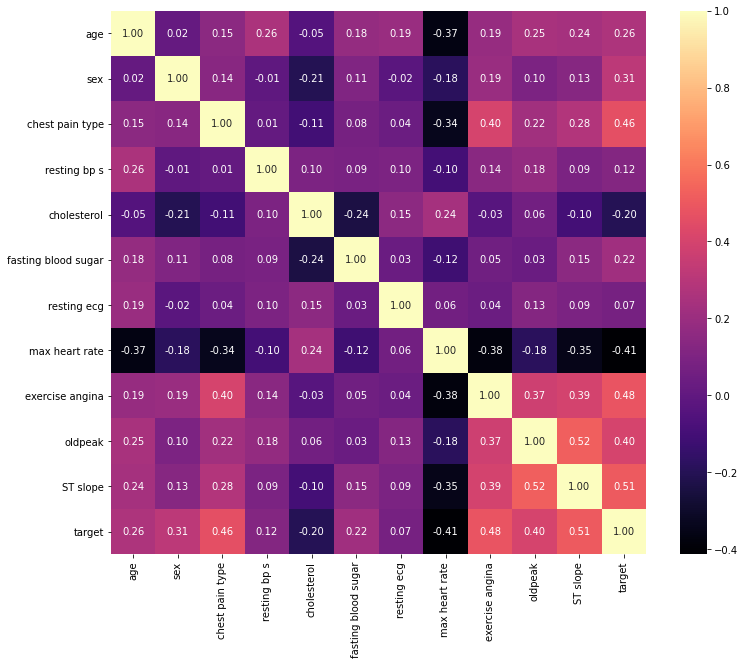

In [6]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

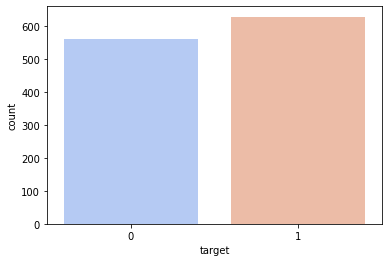

1    909
0    281
Name: sex, dtype: int64

In [7]:
sns.countplot(x="target", data=df, palette="coolwarm")
plt.show()

df['sex'].value_counts()



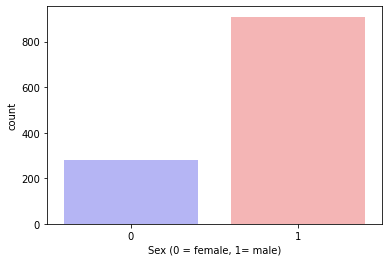

In [8]:
sns.countplot(x='sex', data=df, palette="bwr")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

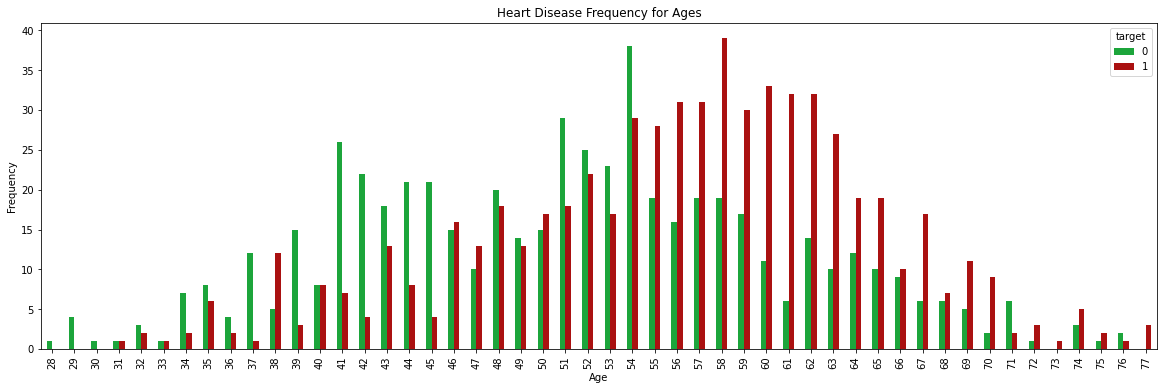

In [9]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6),color=['#1CA53B','#AA1111' ])
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()


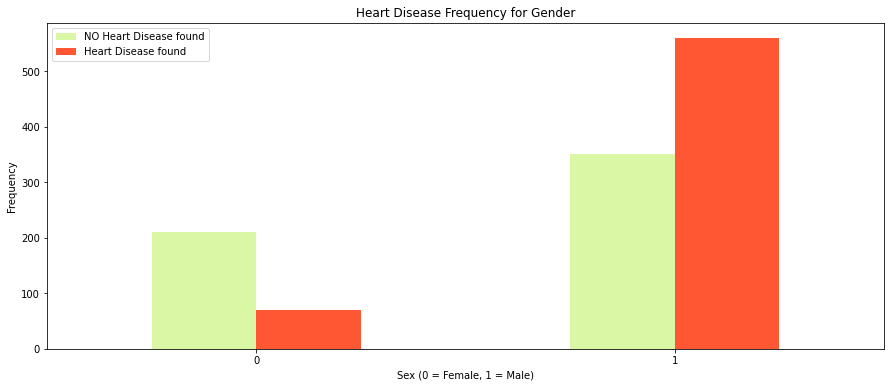

In [10]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Heart Disease Frequency for Gender')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["NO Heart Disease found", "Heart Disease found"])
plt.ylabel('Frequency')
plt.show()


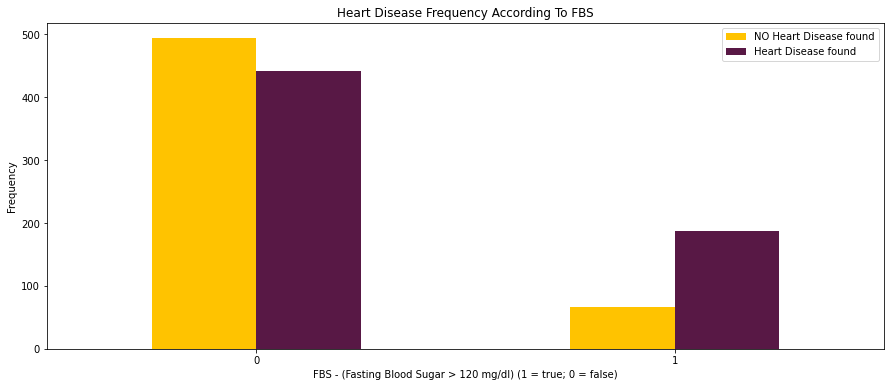

In [11]:


pd.crosstab(df['fasting blood sugar'] ,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('Heart Disease Frequency According To FBS')
plt.xlabel('FBS - (Fasting Blood Sugar > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["NO Heart Disease found", "Heart Disease found"])
plt.ylabel('Frequency')
plt.show()



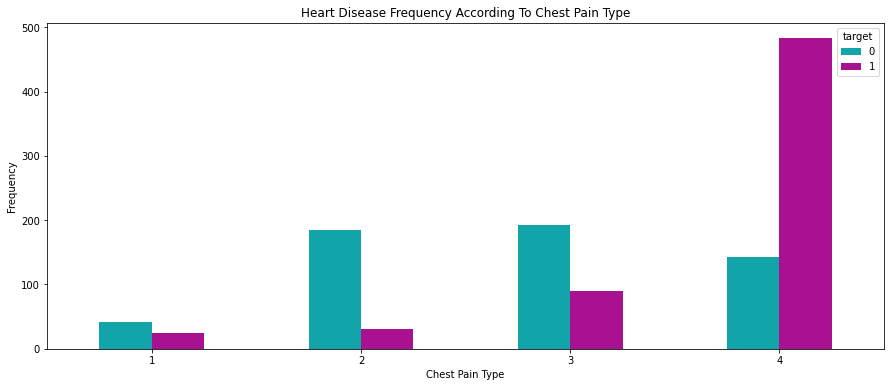

In [12]:
pd.crosstab(df['chest pain type'],df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()



In [13]:
X = df.drop(columns='target',axis = 1)
Y = df['target']

In [14]:
print(X)

      age  sex  chest pain type  resting bp s  cholesterol  \
0      40    1                2           140          289   
1      49    0                3           160          180   
2      37    1                2           130          283   
3      48    0                4           138          214   
4      54    1                3           150          195   
...   ...  ...              ...           ...          ...   
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0             172                0   
1                       0            0             156                0   
2                       0     

In [15]:
print(Y)

0       0
1       1
2       0
3       1
4       0
       ..
1185    1
1186    1
1187    1
1188    1
1189    0
Name: target, Length: 1190, dtype: int64


In [16]:
X_train,X_test,Y_train,Y_split = train_test_split(X,Y, test_size=0.2,stratify=Y,random_state=2)
print(X.shape,X_train.shape, X_test.shape)

(1190, 11) (952, 11) (238, 11)


***Test Size = 0.2 indicates 20 % data from dataset is the test part meaning 238 is the test part and remaining 952 is the training part***

# Feature Importance

[0.08195914 0.0633701  0.13099689 0.07971894 0.09144423 0.03584789
 0.03778713 0.09784489 0.12882088 0.09564949 0.15656044]


<AxesSubplot:>

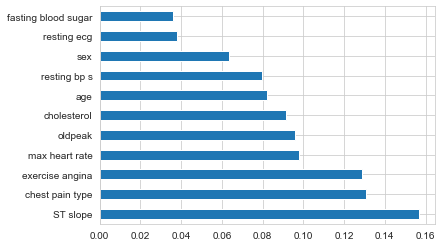

In [39]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,Y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')

## Training Part

In [17]:
accuracies = {}
lr = LogisticRegression()
lr.fit(X_train,Y_train)

acc = lr.score(X_train, Y_train)*100
accuracies['LOGISTIC REGRESSION'] = acc
print("LOGISTIC REGRESSION Accuracy Score : {:.2f}%".format(acc))



from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

acc = rf.score(X_train, Y_train)*100
accuracies['RANDOM FOREST'] = acc
print("RANDOM FOREST Algorithm Accuracy Score : {:.2f}%".format(acc))



from sklearn.svm import SVC  
svm = SVC()
svm.fit(X_train, Y_train)

acc = svm.score(X_train,Y_train)*100
accuracies['SVM'] = acc
print("Train Accuracy of SVM Algorithm: {:.2f}%".format(acc))




from sklearn.naive_bayes import GaussianNB  
nb = GaussianNB()  
nb.fit(X_train, Y_train)  

acc = nb.score(X_train, Y_train)*100
accuracies['NAIVE BAYES'] = acc
print("NAIVE BAYES Algorithm Accuracy Score : {:.2f}%".format(acc))




from sklearn.tree import DecisionTreeClassifier  
dt= DecisionTreeClassifier()  
dt.fit(X_train,Y_train)  

acc = dt.score(X_train, Y_train)*100
accuracies['DECISION TREE'] = acc
print("DECISION TREE Algorithm Accuracy Score : {:.2f}%".format(acc))

LOGISTIC REGRESSION Accuracy Score : 82.67%
RANDOM FOREST Algorithm Accuracy Score : 100.00%
Train Accuracy of SVM Algorithm: 70.80%
NAIVE BAYES Algorithm Accuracy Score : 84.03%
DECISION TREE Algorithm Accuracy Score : 100.00%


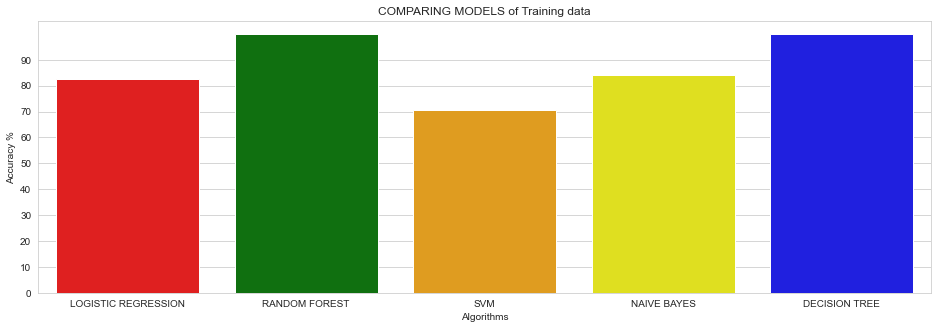

In [18]:
colors = ["red","green","orange","yellow","blue","black"]
sns.set_style("whitegrid")

plt.figure(figsize=(16,5))
plt.title('COMPARING MODELS of Training data')
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()



## Testing Part

In [19]:

acc = lr.score(X_test, Y_split)*100
accuracies['LOGISTIC REGRESSION'] = acc
print("LOGISTIC REGRESSION Accuracy Score : {:.2f}%".format(acc))

acc = dt.score(X_test, Y_split)*100
accuracies['DECISION TREE'] = acc
print("DECISION TREE Accuracy Score : {:.2f}%".format(acc))

acc = nb.score(X_test, Y_split)*100
accuracies['NAIVE BAYES'] = acc
print("NAIVE BAYES Accuracy Score : {:.2f}%".format(acc))

acc = svm.score(X_test, Y_split)*100
accuracies['SVM'] = acc
print("SVM Accuracy Score : {:.2f}%".format(acc))

acc = rf.score(X_test, Y_split)*100
accuracies['RANDOM FOREST'] = acc
print("RANDOM FOREST Accuracy Score : {:.2f}%".format(acc))



LOGISTIC REGRESSION Accuracy Score : 81.09%
DECISION TREE Accuracy Score : 89.92%
NAIVE BAYES Accuracy Score : 82.77%
SVM Accuracy Score : 73.53%
RANDOM FOREST Accuracy Score : 92.86%


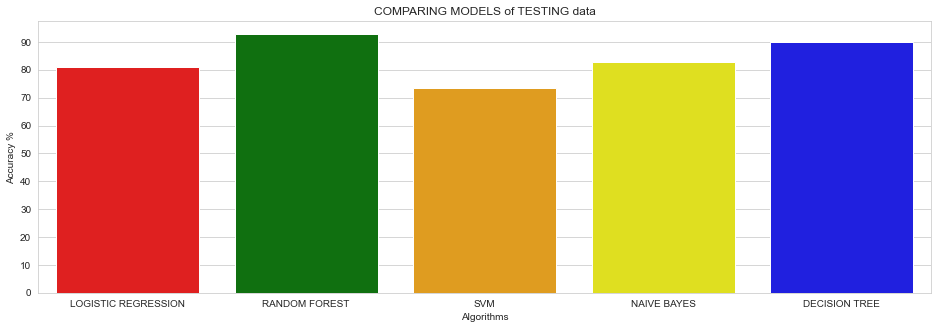

In [20]:
colors = ["red","green","orange","yellow","blue","black"]
sns.set_style("whitegrid")

plt.figure(figsize=(16,5))
plt.title('COMPARING MODELS of TESTING data')
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)
plt.show()



In [21]:

y_head_lr = lr.predict(X_test)
y_head_rf = rf.predict(X_test)
y_head_svm = svm.predict(X_test)
y_head_nb = nb.predict(X_test)
y_head_dtc = dt.predict(X_test)



In [22]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(Y_split,y_head_lr)
cm_svm = confusion_matrix(Y_split,y_head_svm)
cm_nb = confusion_matrix(Y_split,y_head_nb)
cm_dtc = confusion_matrix(Y_split,y_head_dtc)
cm_rf = confusion_matrix(Y_split,y_head_rf)



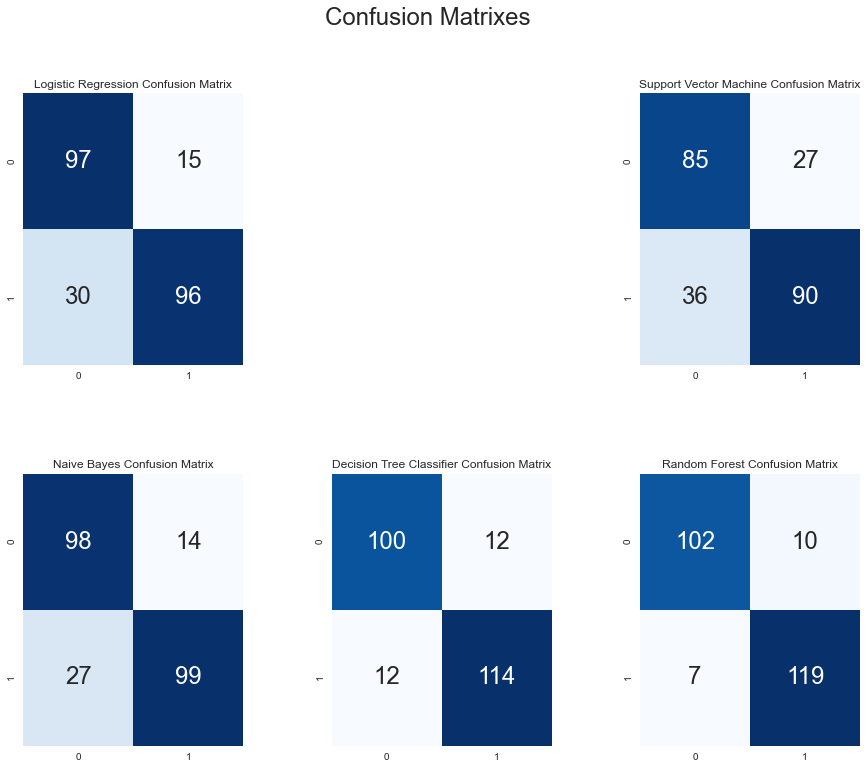

In [42]:

plt.figure(figsize=(15,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,5)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,6)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()


In [24]:
X_test.shape

(238, 11)

In [25]:
import pickle



filename = 'trainedfinalheartmodel1.sav'
pickle.dump(rf, open(filename, 'wb'))

filename_dt = 'trainedmodeldt.sav'
pickle.dump(dt, open(filename_dt, 'wb'))

filename_lr = 'trainedmodellr.sav'
pickle.dump(lr, open(filename_lr, 'wb'))

filename_nb = 'trainedmodelnb.sav'
pickle.dump(nb, open(filename_nb, 'wb'))

filename_svm = 'trainedmodelsvm.sav'
pickle.dump(svm, open(filename_svm, 'wb'))


In [26]:

loaded_model_svm = pickle.load(open('trainedmodelsvm.sav', 'rb'))
loaded_model_lr = pickle.load(open('trainedmodellr.sav', 'rb'))
loaded_model_nb = pickle.load(open('trainedmodelnb.sav', 'rb'))
loaded_model_dt = pickle.load(open('trainedmodeldt.sav', 'rb'))
loaded_model = pickle.load(open('trainedfinalheartmodel1.sav', 'rb'))



## Voting Classifer

**RF**

In [27]:

input_data = (40,1,2,140,289,0,0,172,0,0.0,1)
input_data_as_numpy_array = np.asarray(input_data)
input_reshape = input_data_as_numpy_array.reshape(1,-1)


prediction = loaded_model.predict(input_reshape)
print(prediction)



if (prediction[0]==0):
    print('The person does not heart disease')
else:
    print('The person has heart disease')

[0]
The person does not heart disease


**DT**

In [28]:

input_data = (40,1,2,140,289,0,0,172,0,0.0,1)
input_data_as_numpy_array = np.asarray(input_data)
input_reshape = input_data_as_numpy_array.reshape(1,-1)


prediction = loaded_model_dt.predict(input_reshape)
print(prediction)



if (prediction[0]==0):
    print('The person does not heart disease')
else:
    print('The person has heart disease')

[0]
The person does not heart disease


**SVM**

In [29]:

input_data = (40,1,2,140,289,0,0,172,0,0.0,1)
input_data_as_numpy_array = np.asarray(input_data)
input_reshape = input_data_as_numpy_array.reshape(1,-1)


prediction = loaded_model_svm.predict(input_reshape)
print(prediction)



if (prediction[0]==0):
    print('The person does not heart disease')
else:
    print('The person has heart disease')

[0]
The person does not heart disease


**LR**

In [30]:
input_data = (40,1,2,140,289,0,0,172,0,0.0,1)
input_data_as_numpy_array = np.asarray(input_data)
input_reshape = input_data_as_numpy_array.reshape(1,-1)


prediction = loaded_model_lr.predict(input_reshape)
print(prediction)



if (prediction[0]==0):
    print('The person does not heart disease')
else:
    print('The person has heart disease')

[0]
The person does not heart disease


**NB**

In [31]:

input_data = (40,1,2,140,289,0,0,172,0,0.0,1)
input_data_as_numpy_array = np.asarray(input_data)
input_reshape = input_data_as_numpy_array.reshape(1,-1)


prediction = loaded_model_nb.predict(input_reshape)
print(prediction)



if (prediction[0]==0):
    print('The person does not heart disease')
else:
    print('The person has heart disease')

[0]
The person does not heart disease
